<a href="https://colab.research.google.com/github/johanhoffman/DD2363_VT22/blob/hannahklingberg-lab5/Lab5/hannahklingberg_lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 5: Integration**
**Hanna Klingberg**

# **Abstract**

This lab explores the quadrature method for approximating integrals. Both the Gauss quadrature and the Monte Carlo quadrature are implemented and tested. The theory behind each algorithm is described in its corresponding section. All functions passed their tests, and the Monte Carlo quadratures can be seen to converge as expected in the plots. 



#**About the code**

A short statement on who is the author of the file, and if the code is distributed under a certain license. 

In [ ]:
"""This program is a template for lab reports in the course"""
"""DD2363 Methods in Scientific Computing, """
"""KTH Royal Institute of Technology, Stockholm, Sweden."""

# Copyright (C) 2020 Johan Hoffman (jhoffman@kth.se)

# This file is part of the course DD2365 Advanced Computation in Fluid Mechanics
# KTH Royal Institute of Technology, Stockholm, Sweden
#
# This is free software: you can redistribute it and/or modify
# it under the terms of the GNU Lesser General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.

# This template is maintained by Johan Hoffman
# Please report problems to jhoffman@kth.se

'KTH Royal Institute of Technology, Stockholm, Sweden.'

# **Set up environment**

To have access to the neccessary modules you have to run this cell. If you need additional modules, this is where you add them. 

In [ ]:
# Load neccessary modules.
from google.colab import files

import time
import numpy as np
import math 
import random
import scipy.integrate as integrate
import matplotlib.pyplot as plt

#try:
#    from dolfin import *; from mshr import *
#except ImportError as e:
#    !apt-get install -y -qq software-properties-common 
#    !add-apt-repository -y ppa:fenics-packages/fenics
#    !apt-get update -qq
#    !apt install -y --no-install-recommends fenics
#    from dolfin import *; from mshr import *
    
#import dolfin.common.plotting as fenicsplot

from matplotlib import pyplot as plt
from matplotlib import tri
from matplotlib import axes
from mpl_toolkits.mplot3d import Axes3D

# **Introduction**

This lab investigates approximation of integrals by using quadrature rules. Both determinisitc quadratures, namely Gauss quadrature, and non-deterministic quadrature i.e. the Monte Carlo method are implemented and tested. The theory behind each algorithm is described in its corresponding section in the method. 



# **Method**

# **2-point Gauss quadrature over a unit interval**

The Gauss quadrature rule is the approximation of the integral of a function f(x) in the interval [a,b]: 
$ \int_{a}^b f(x) dx = \sum_{i=0}^q p(x_i)w_i$ such that it is exact for polynomial integrands up to degree $2q+1$. 

In example 11.2 (chapter 11.3, course boook), it is igven that the 2-point Gauss rule on tthe interval [-1,1] is determinet such that:
$\int_{-1}^1 p(x) dx = p(x_0)w_0 + p(x_1)w_1 $
and that $w_0 = w_1 = 1$, $x_0 = \frac{1}{\sqrt{3}} $, $ x_1 = \frac{1}{\sqrt{3}} $ 

Using a coordinate map $F: I \rightarrow \hat{I} $ where $I = [-1,1]$ and $\hat{I} = [0,1]$:

$x_0, x_1, w_0, w_1$ can be recalculated such that:

$x_0 = \frac{\sqrt{3} + 1}{2 \sqrt{3}} $, 
$x_1 = \frac{\sqrt{3} - 1}{2 \sqrt{3}} $, 
$w_0 = w_1 = \frac{1}{2} $
(used calculations from problem 11.3)

The formula $\sum_{i=0}^1 p(x_i)w_i $ is then used with the calculated values. 

The algorithm takes as input a function f, and returns the approximated integral in the interval [0,1] according to the formula above. The equation is tested by generating a random polynomial of the form $ax^3 + bx^2 + cx + d$, calculating the real integral and comparing it with the one calculated by the algorithm.


In [ ]:
def gauss_quad(f):
  w0 = 1/2
  w1 = 1/2
  x0 = (math.sqrt(3) + 1)/(2*math.sqrt(3))
  x1 = (math.sqrt(3) - 1)/(2*math.sqrt(3))
  return w0*f(x0) + w1*f(x1)

In [ ]:
def test_gauss():
  #verify exact integration of cubic polynomials ax^3 + bx^2 + cx + d
  a = random.randint(0,100)
  b = random.randint(0,100)
  c = random.randint(0,100)
  d = random.randint(0,100)

  f = lambda x: a*x**3 + b*x**2 + c*x + d
  verification = integrate.quad(f, 0, 1)[0]
  result = gauss_quad(f)
  return np.isclose(verification, result, 10**-8)

test_gauss()



True

# **3-point edge midpoint quadrature over a reference triangle**
A 3-point quadrature rule over the reference triangle has the vertices (0,0) (1,0) and (1,1). 

As stated in example 11.5, the quadrature points are chosen as the midpoints of the three edges of the reference triangle, i.e. $(0, \frac{1}{2}), (\frac{1}{2}, 0), (\frac{1}{2}, \frac{1}{2}) $. The weights are defined as $w_0 = w_1 = w_2 = \frac{1}{6}$.

The quadrature rule is then simply defined as the weighted sum of the functioon evaluated at the quadrature points.

The testing is done by randomly generating a two variable polynomial $ax^2 + by^2 + cxy + dx + ey + f$, and calculating the true integral of the function and comparing it to the approximated result. 

In [ ]:
def mid_quad(f):
  w = 1/6
  return w*(f(0.5,0.5) + f(0.5, 0) + f(0, 0.5))


In [ ]:
def test_mid_quad():
  a = random.randint(0,100)
  b = random.randint(0,100)
  c = random.randint(0,100)
  d = random.randint(0,100)
  e = random.randint(0,100)
  f = random.randint(0,100)
  func = lambda x,y: a*x**2 + b*y**2 + c*x*y + d*x + e*y + f
  verification = integrate.dblquad(func, 0, 1, lambda x: 0, lambda x: 1-x)[0]
  result = mid_quad(func)
  return np.isclose(result, verification, 10**-8)

test_mid_quad()

True

# **Monte Carlo quadrature over a unit interval**

Monte Carlo quadrature is a non-deterministic approach to approximating integrals. 
The integral is approximated by randomly sampling quadrature points, and taking the mean of those. By the law of large numbers, as n increases, the mean of the samples approaches the true value of the integral, such that: 

$\int_D g(x) dx \approx \frac{|D|}{n} \sum_{i=1}^n g(x_i) $
In an integral over the unit interval, $|D|$ is simply 1, so the integral is approximated as

$\frac{1}{n}\sum_{i=1}^n g(x_i)$

The algorithm takes a function f and number of iterations n as input, and returns the mean of the n random samples. 

The testing is done by calculating the error $\int_0^1 g(x) dx - \sum_{i=0}^{n} g(x_i)$ and plotting it against $\frac{1}{\sqrt{n}}$

In [ ]:
def monte_carlo_quad(f, n):
  x = [f(random.random()) for i in range(n)]
  return sum(x)/n

In [ ]:
def test_monte_carlo():
  f = lambda x: x**2
  ver= integrate.quad(f, 0, 1)[0]
  n = np.array(range(5,100))*10
  error = [np.abs(ver - monte_carlo_quad(f, i)) for i in n ] 
  plt.plot(n, error)
  plt.plot(n, 1/np.sqrt(n))
  plt.xlabel("number of samples")
  plt.ylabel("error")
  plt.title("Monte Carlo quadrature over a unit interval")
  plt.show()



# **Monte Carlo quadrature over a reference triangle**

Monte Carlo quadrature over a reference triangle is based on sampling quadrature points uniformly random from within the refrence triangle. 

As per the formula explained in the algorithm above:

$\int_D g(x) dx \approx \frac{|D|}{n} \sum_{i=1}^n g(x_i) $

And since the size of the triangle $|D| = \frac{1}{2}$. Since the sampled quadrature points have to be within the reference triangle, if the sampled node $(x,y)$ is outside the triangle such that $x + y > 1$, the reflection of x and y are used such that $ x = 1 - y, y = 1-x$. 

The testing is done by calculating the approximation with an increasing amount of sampling ponts $n$, and calculating the true value of the integral. The error
$ \int_D g(x) dx - \frac{1}{2n} \sum_{i=0}^n g(x_i) $ is then calculated for each n and plotted against the function $\frac{1}{\sqrt{n}}$. 

In [ ]:
def monte_carlo_ref(f, n):
  sum = 0
  for i in range(n): 
    x, y = random.random(), random.random()
    if x + y > 1:
      sum += f(1-y, 1-x)
    else:
      sum += f(x,y)
  return sum/(2*n)

In [ ]:
def test_monte_carlo_ref():
  func = lambda x, y: x**2 + y**2
  verification = integrate.dblquad(func, 0, 1, lambda x: 0, lambda x: 1-x)[0]
  n = np.array(range(50,1000))*10
  error = [np.abs(verification - monte_carlo_ref(func, i)) for i in n ] 
  plt.plot(n, error)
  plt.plot(n, 1/np.sqrt(n))
  plt.title("Monte Carlo quadrature over a reference triangle")
  plt.xlabel("n samples")
  plt.ylabel("error")
  plt.show()


# **Results**

The results of the tests are presented below, as well as the plots. The methodology of the tests are described in the definition for each function. 

2-point Gauss quadrature passed the test
3-point edge midpoint quadrature passed the test
2 of 2 functions passed their tests 



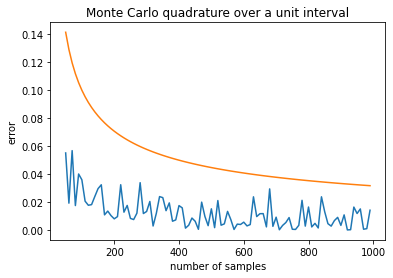

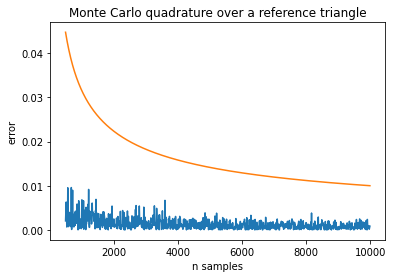

In [ ]:
def test():
  passed = 0
  if test_gauss():
    passed +=1
    print("2-point Gauss quadrature passed the test")
  if test_mid_quad():
    passed += 1
    print("3-point edge midpoint quadrature passed the test")
  print("%d of 2 functions passed their tests \n" %(passed))
  test_monte_carlo()
  test_monte_carlo_ref()

test()

# **Discussion**

All functions passed their tests. It can be seen in both the Monte Carlo functions that they do converge under $\frac{1}{\sqrt{n}}$. The result of the Monte Carlo quadrature over a reference triangle seem to be more under the convergence curve than the Monte Carlo quadrature over a unit interval, which surprised me. 